# 4. Exploration and Analysis

We now have created a CSV file, in which our data are complete from 1987 to 2018. Because we are missing a larger portion of data from before 1987 and after 2018, we have filtered out data before and after, to ensure our model are trained on valid data.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [27]:
# Load new combined CSV's with data
df_1987_2018 = pd.read_csv('https://raw.githubusercontent.com/badranyoussef/bi-exam-project-stock/refs/heads/main/datasets/data_1987_2018.csv')

In [28]:
df_1987_2018

,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,Open RUSSELL2000,...,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold,Date
0,321.829987,327.339996,321.829987,327.329987,1.932000e+08,7.29,6.0,4.3,115.000,170.820007,...,170.250000,171.399994,1.932000e+08,18.50,453.46,455.67,453.46,453.46,-1.20,1987-10-01
1,327.329987,328.940002,327.220001,328.070007,1.891000e+08,7.29,6.0,4.3,115.000,171.399994,...,171.399994,172.080002,1.891000e+08,18.65,454.87,455.42,454.87,454.87,0.31,1987-10-02
2,328.070007,328.570007,326.089996,328.079987,1.597000e+08,7.29,6.0,4.3,115.000,172.089996,...,172.089996,172.539993,1.597000e+08,18.78,456.83,457.02,456.83,456.83,0.43,1987-10-05
3,328.079987,328.079987,319.170013,319.220001,1.756000e+08,7.29,6.0,4.3,115.000,172.550003,...,170.130005,170.210007,1.756000e+08,18.60,457.02,458.55,457.02,457.02,0.04,1987-10-06
4,319.220001,319.390015,315.779999,318.540009,1.863000e+08,7.29,6.0,4.3,115.000,170.210007,...,168.479996,168.869995,1.863000e+08,18.58,457.63,459.41,457.63,457.63,0.13,1987-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748,2684.219971,2685.350098,2678.129883,2683.340088,2.399830e+09,1.42,4.7,2.2,247.805,1547.239990,...,1541.699951,1542.930054,2.399830e+09,64.61,1275.01,1267.12,1276.38,1265.10,0.65,2017-12-22
7749,2679.090088,2682.739990,2677.959961,2680.500000,1.968780e+09,1.42,4.7,2.2,247.805,1542.739990,...,1541.209961,1544.229980,1.968780e+09,64.61,1283.29,1274.91,1283.77,1273.25,0.63,2017-12-26
7750,2682.100098,2685.639893,2678.909912,2682.620117,2.202080e+09,1.42,4.7,2.2,247.805,1544.390015,...,1541.949951,1543.939941,2.202080e+09,66.03,1287.41,1283.64,1289.40,1281.46,0.32,2017-12-27
7751,2686.100098,2687.659912,2682.689941,2687.540039,2.153330e+09,1.42,4.7,2.2,247.805,1544.050049,...,1542.520020,1548.930054,2.153330e+09,66.80,1294.84,1287.31,1295.30,1286.66,0.58,2017-12-28


In [29]:
# To ensure our Date column is DateTime format
df_1987_2018['Date'] = pd.to_datetime(df_1987_2018['Date'])

In [30]:
columns_corr = df_1987_2018.columns.difference(['Date'])
columns_corr

Index(['CPIAUCSL', 'Change % Gold', 'Close Gold', 'Close Oil',
       'Close RUSSELL2000', 'Close SP500', 'High Gold', 'High RUSSELL2000',
       'High SP500', 'Inflation Rate', 'Interest Rate', 'Low Gold',
       'Low RUSSELL2000', 'Low SP500', 'Open Gold', 'Open RUSSELL2000',
       'Open SP500', 'Unemployment Rate', 'Volume RUSSELL2000',
       'Volume SP500'],
      dtype='object')

In [31]:
df_1987_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open SP500          7753 non-null   float64       
 1   High SP500          7753 non-null   float64       
 2   Low SP500           7753 non-null   float64       
 3   Close SP500         7753 non-null   float64       
 4   Volume SP500        7753 non-null   float64       
 5   Interest Rate       7753 non-null   float64       
 6   Unemployment Rate   7753 non-null   float64       
 7   Inflation Rate      7753 non-null   float64       
 8   CPIAUCSL            7753 non-null   float64       
 9   Open RUSSELL2000    7753 non-null   float64       
 10  High RUSSELL2000    7753 non-null   float64       
 11  Low RUSSELL2000     7753 non-null   float64       
 12  Close RUSSELL2000   7753 non-null   float64       
 13  Volume RUSSELL2000  7753 non-null   float64     

## Data overview
Let's see how the data looks in a line plot for the data frame df_1987_2018.

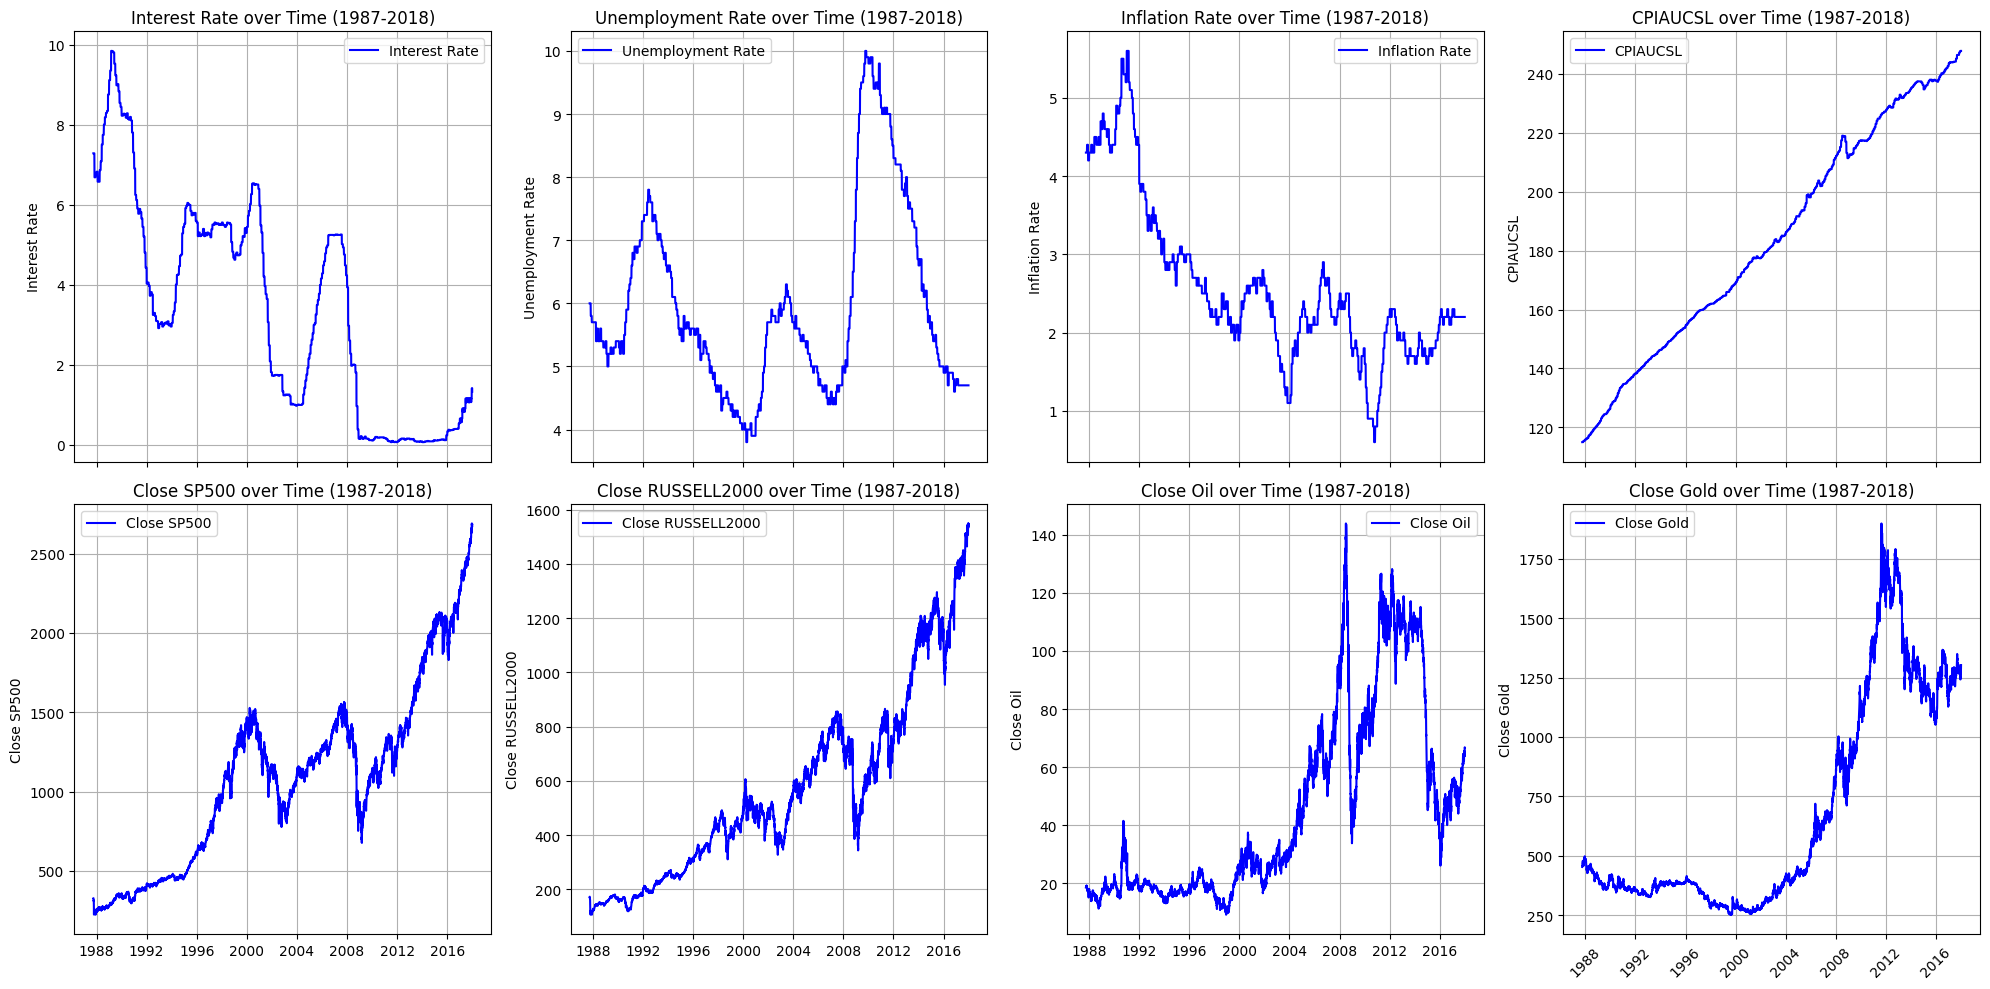

In [32]:
# Liste af kolonner, der skal plottes
columns_to_plot = [
    'Interest Rate',
    'Unemployment Rate',
    'Inflation Rate',
    'CPIAUCSL',
    'Close SP500',
    'Close RUSSELL2000',
    'Close Oil',
    'Close Gold'
]

# Opret en figur med subplots
n_cols = 4  # Antal kolonner til subplots
n_rows = 2  # Antal rækker til subplots

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharex=True)

# Fladgør axes array for nem adgang
axes = axes.flatten()

# Opret plot for hver kolonne
for i, column in enumerate(columns_to_plot):
    axes[i].plot(df_1987_2018['Date'], df_1987_2018[column], label=column, color='blue')
    
    axes[i].set_title(f'{column} over Time (1987-2018)')
    axes[i].set_ylabel(column)
    axes[i].grid()
    axes[i].legend()

# Juster layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comment
In general we can see that inflation and interest rate have fallen to a lower point over time, while stock index prices have reached a higher price.

The increase in stock index prices follows the increase in CPI upwards. It seems like we have a positive correlation between CPI and stocks, and a negative correlation between stocks and inflation and interest rate.

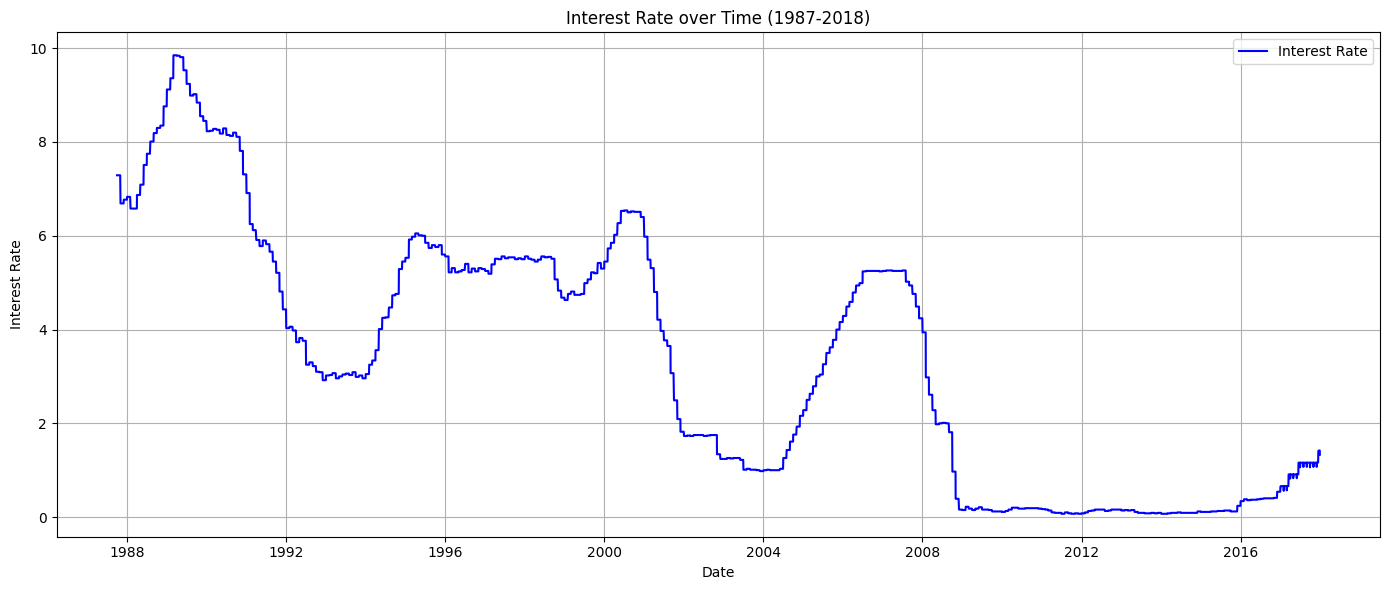

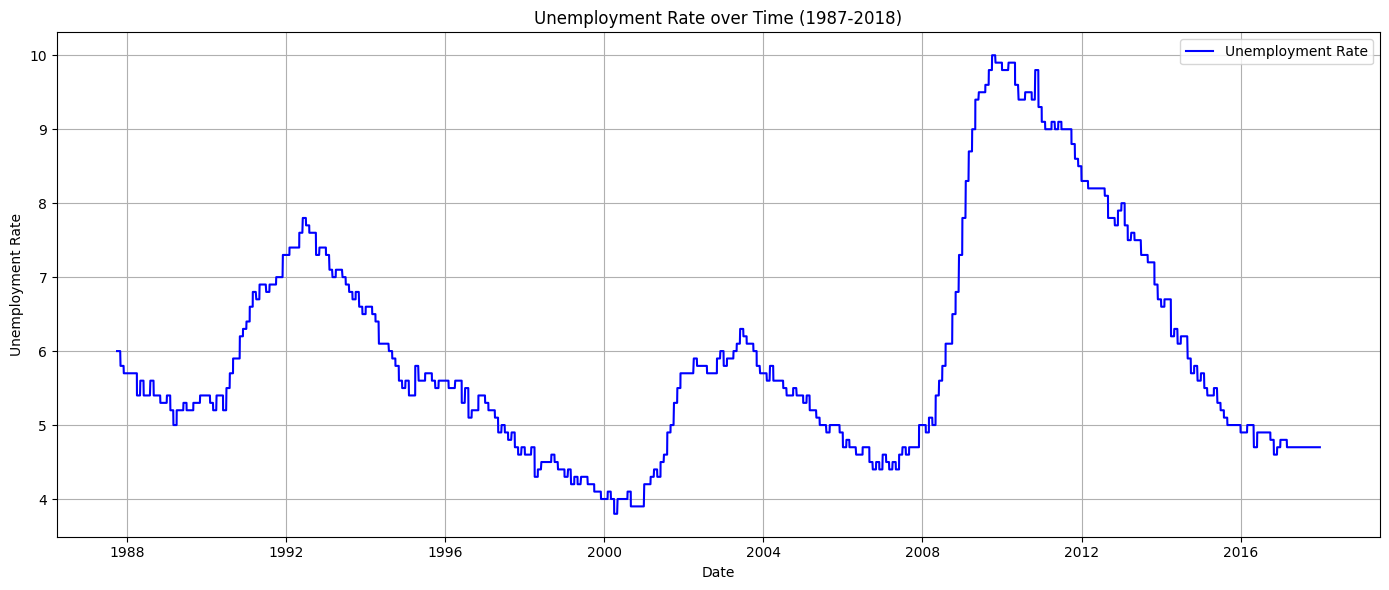

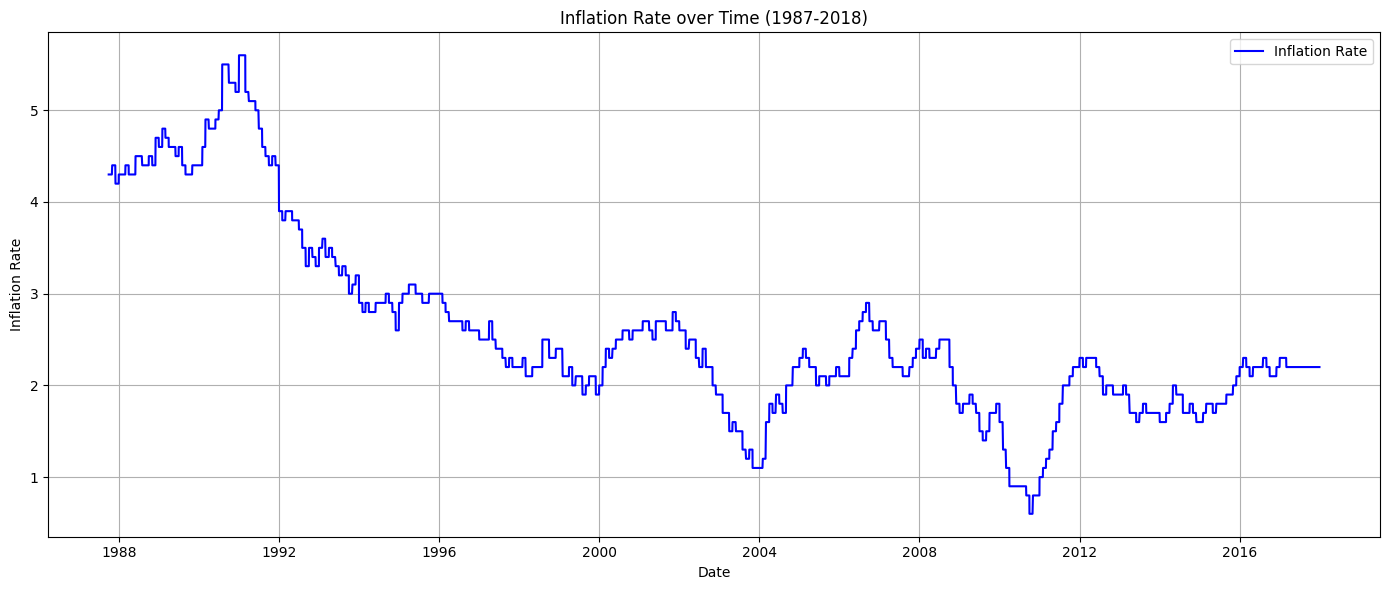

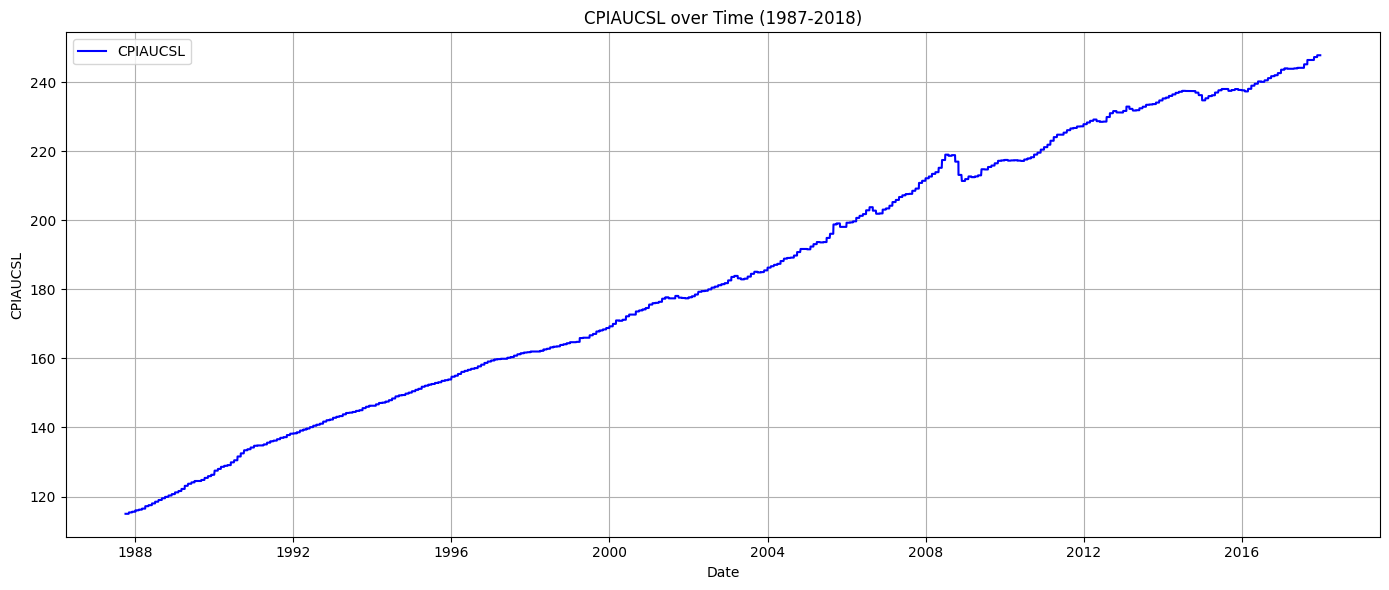

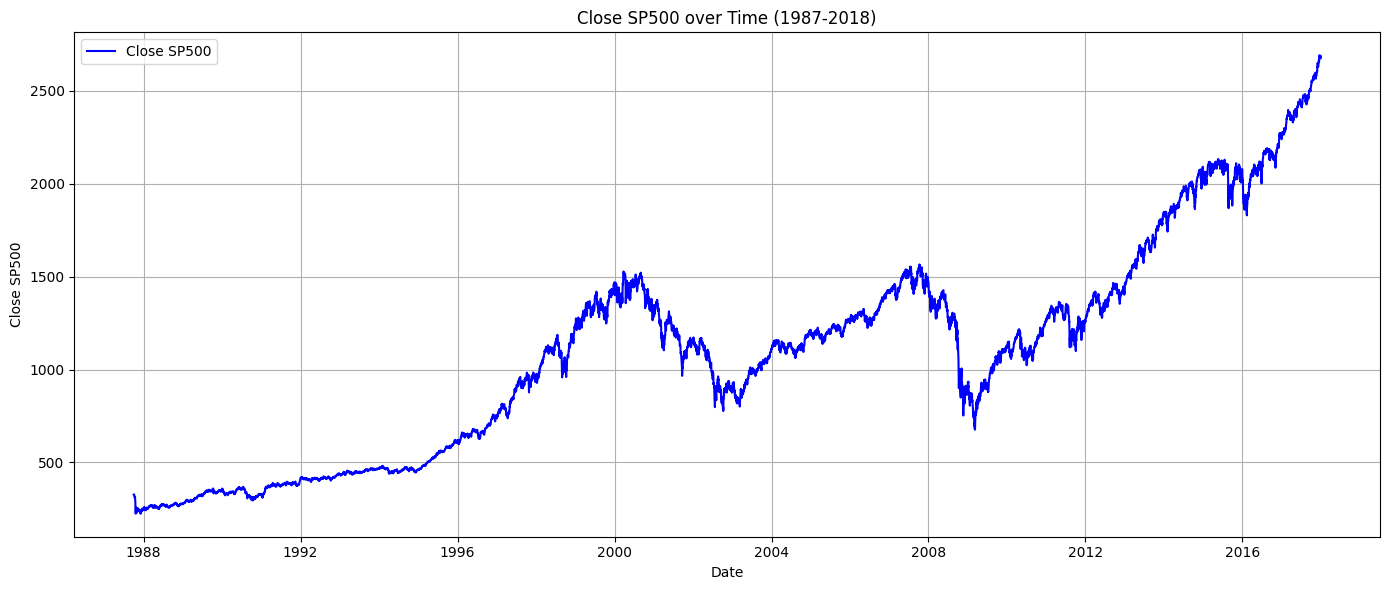

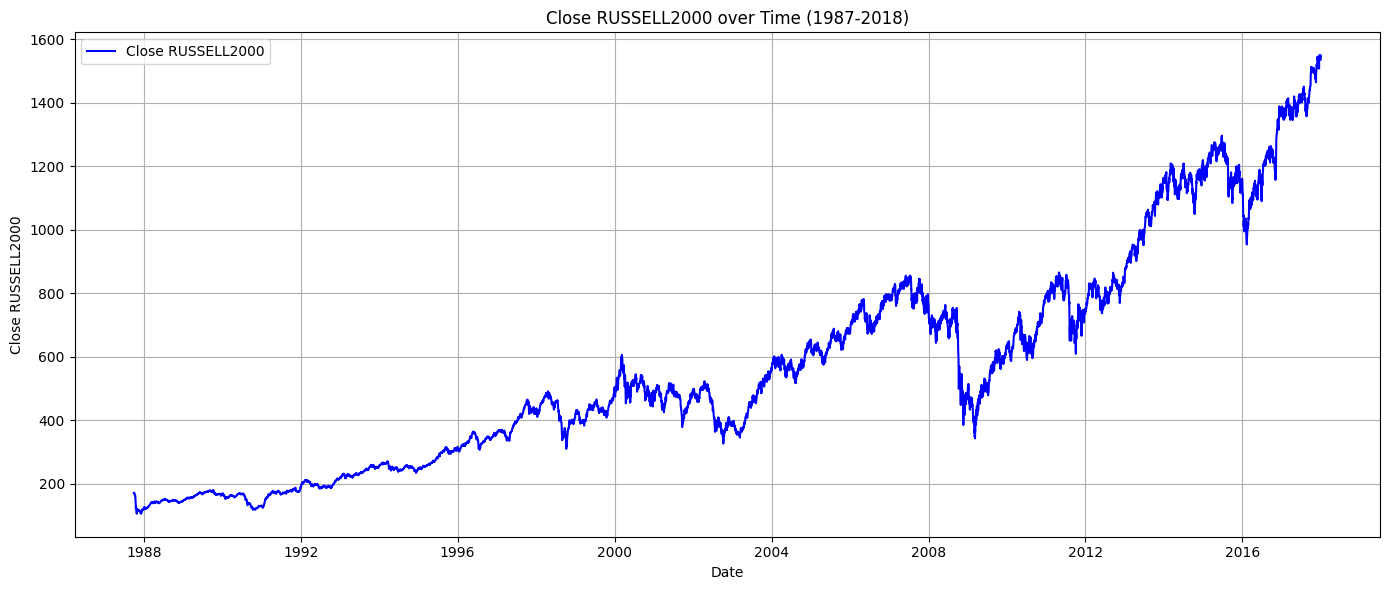

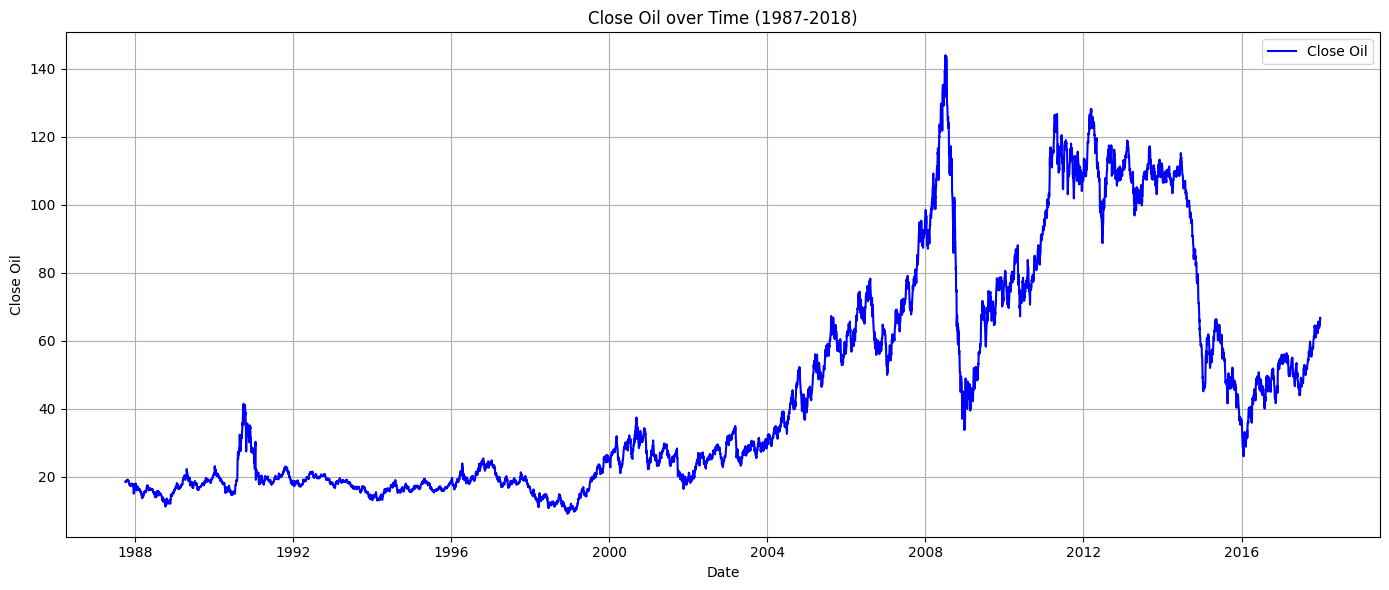

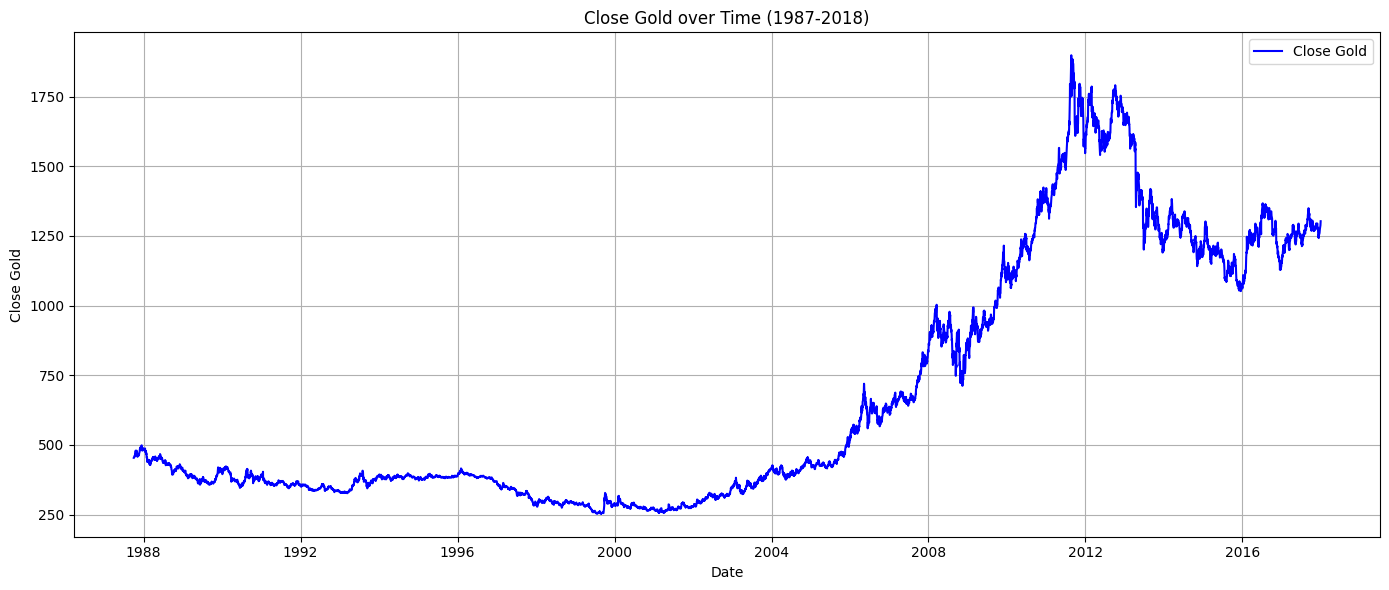

In [33]:
# Opret en figur for hver kolonne
for column in columns_to_plot:
    plt.figure(figsize=(14, 6))
    
    plt.plot(df_1987_2018['Date'], df_1987_2018[column], label=column, color='blue')
    
    plt.title(f'{column} over Time (1987-2018)')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.grid()
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Normalization
We want to normalize our data to be able to better compare it, and then see in a line plot again.

In [34]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Extract 'Date' column and keep it separate
date_column = df_1987_2018['Date']

# Scale the rest of the columns except 'Date'
df_1987_2018_scaled = scaler.fit_transform(df_1987_2018.drop(columns=['Date']))

# Convert the scaled data back into a DataFrame
# Use the original column names except for 'Date'
df_1987_2018_scaled = pd.DataFrame(df_1987_2018_scaled, columns=df_1987_2018.columns.drop('Date'))

# Concatenate the 'Date' column back to the scaled DataFrame
df_1987_2018_scaled = pd.concat([date_column, df_1987_2018_scaled], axis=1)

# Display the first few rows of the scaled DataFrame
df_1987_2018_scaled.head()

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,...,High RUSSELL2000,Low RUSSELL2000,Close RUSSELL2000,Volume RUSSELL2000,Close Oil,Close Gold,Open Gold,High Gold,Low Gold,Change % Gold
0,1987-10-01,0.039636,0.041135,0.042669,0.041930,0.015576,0.738241,0.354839,0.74,0.0,...,0.044650,0.045085,0.045272,0.011931,0.069707,0.122093,0.123146,0.120409,0.124916,0.374038
1,1987-10-02,0.041864,0.041783,0.044852,0.042230,0.015218,0.738241,0.354839,0.74,0.0,...,0.045125,0.045885,0.045743,0.011571,0.070819,0.122950,0.122994,0.121254,0.125793,0.451514
2,1987-10-05,0.042163,0.041633,0.044394,0.042234,0.012648,0.738241,0.354839,0.74,0.0,...,0.045441,0.046365,0.046062,0.008992,0.071783,0.124141,0.123964,0.122429,0.127011,0.457671
3,1987-10-06,0.042167,0.041434,0.041592,0.038642,0.014038,0.738241,0.354839,0.74,0.0,...,0.045489,0.045002,0.044447,0.010387,0.070449,0.124256,0.124890,0.122543,0.127129,0.437660
4,1987-10-07,0.038579,0.037915,0.040219,0.038366,0.014973,0.738241,0.354839,0.74,0.0,...,0.043831,0.043853,0.043518,0.011326,0.070300,0.124627,0.125411,0.122908,0.127509,0.442278


<Figure size 1800x2000 with 0 Axes>

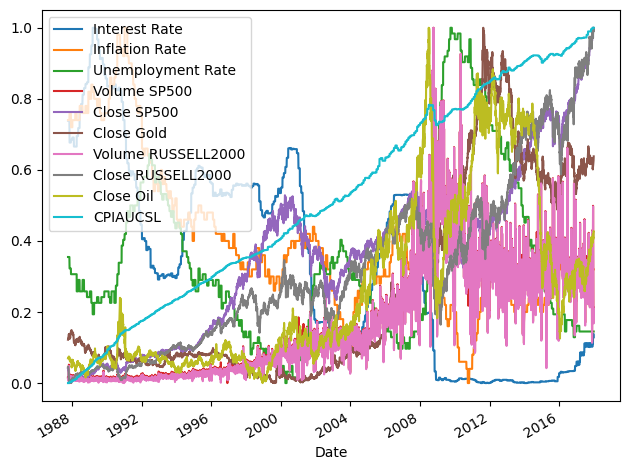

In [35]:
# Line plot of the scaled data set
plt.figure(figsize=(18, 20))
df_1987_2018_scaled.plot.line(y=[
    'Interest Rate', 
    'Inflation Rate', 
    'Unemployment Rate', 
    'Volume SP500', 
    'Close SP500', 
    'Close Gold', 
    'Volume RUSSELL2000', 
    'Close RUSSELL2000', 
    'Close Oil', 
    'CPIAUCSL'
    ], 
    x='Date')
plt.tight_layout()
plt.show()

### Comment
It is hard to see a correlation as we have data points for every day for 30 years. We can still see a positive and negative correlation as mentioned before, otherwise it does not say much.

## Data distribution
Now let's have a look at histograms for our data.

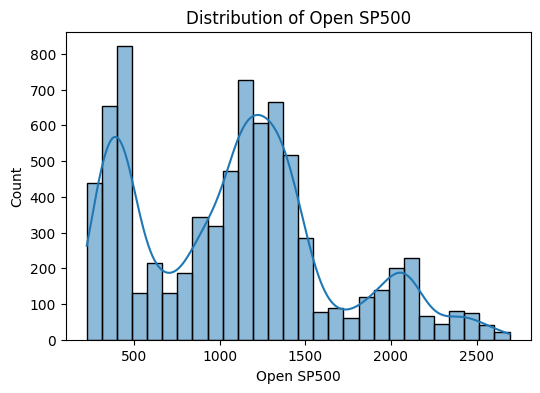

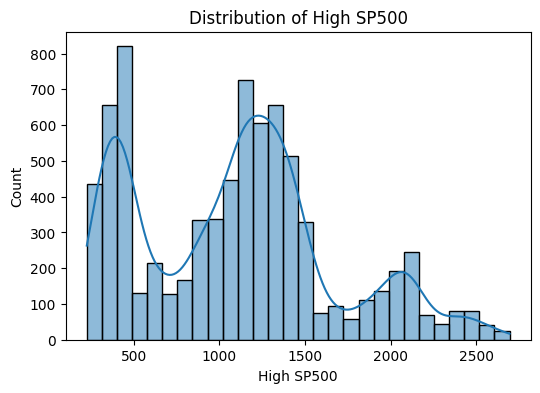

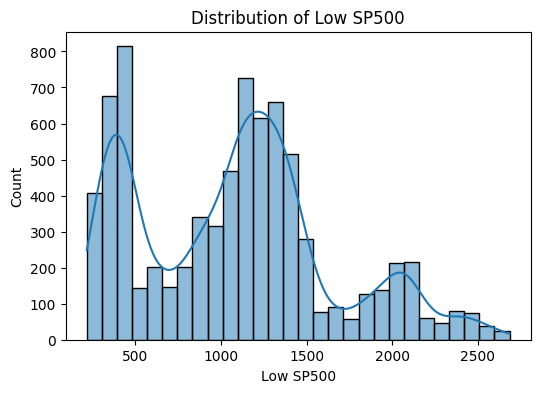

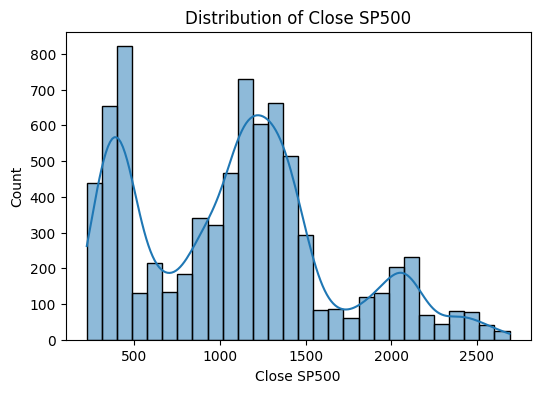

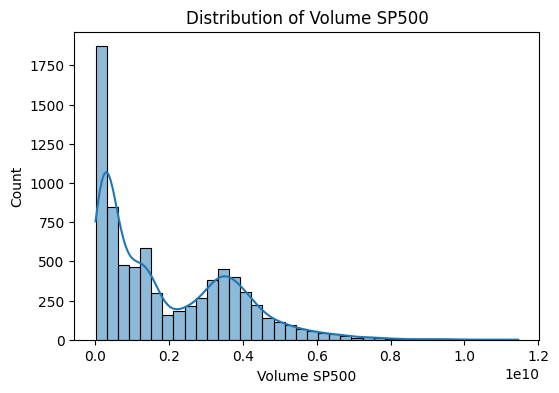

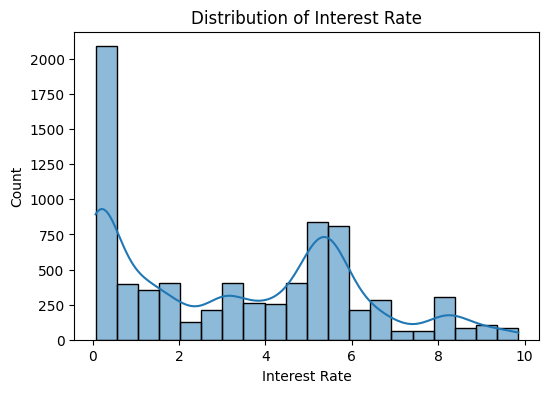

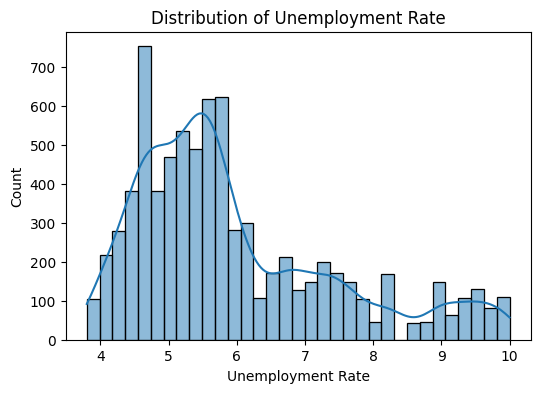

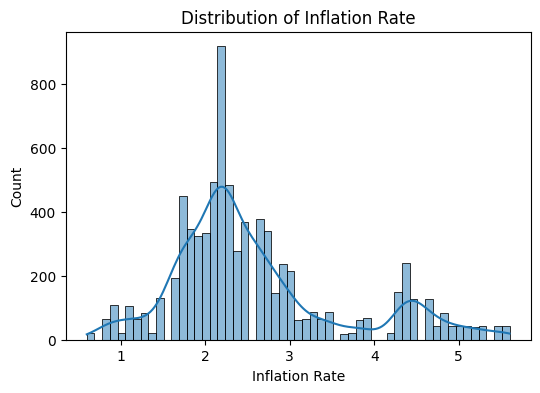

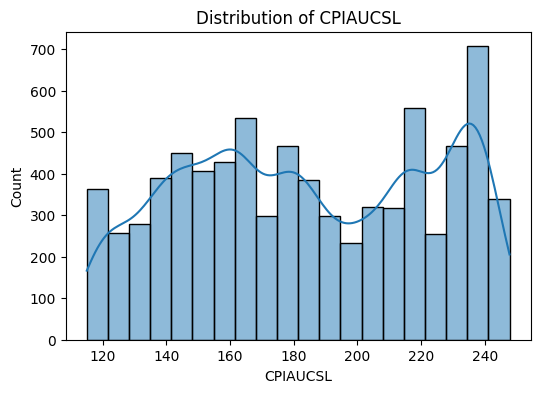

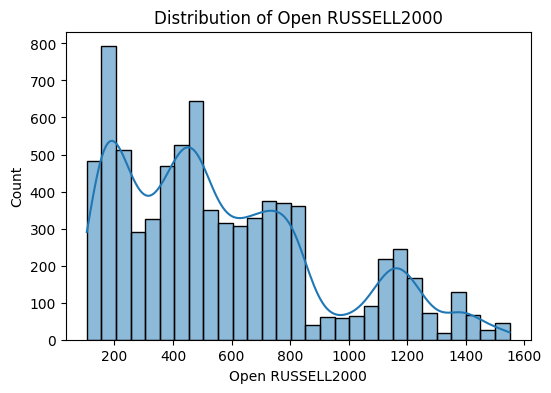

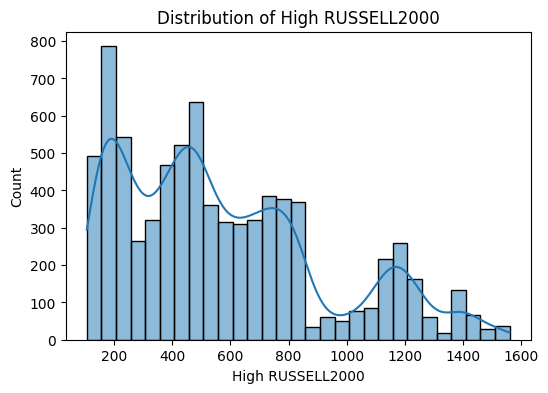

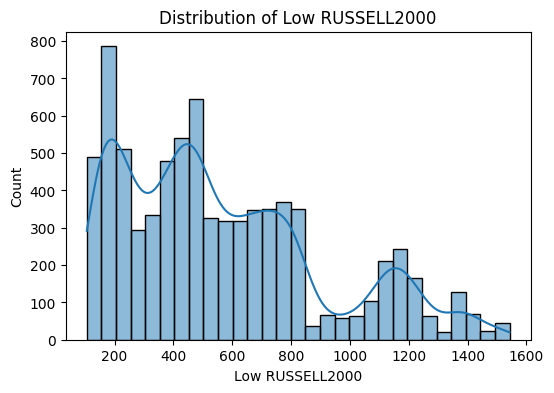

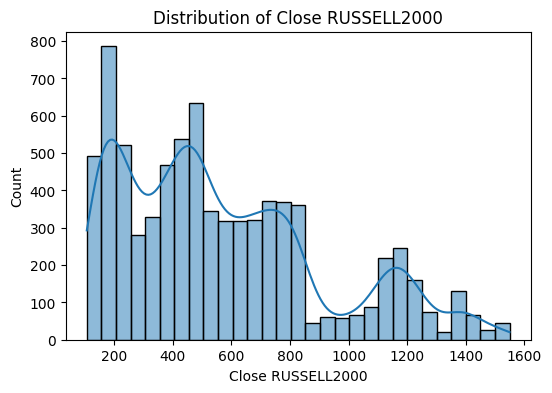

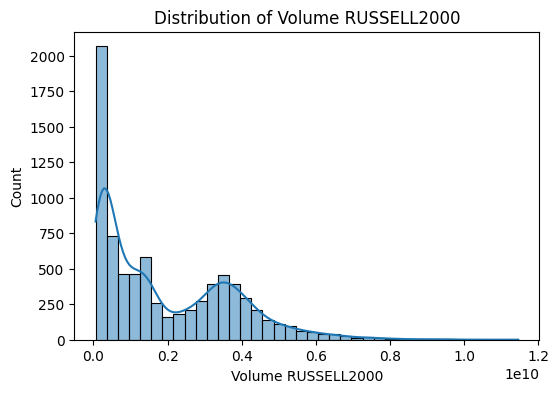

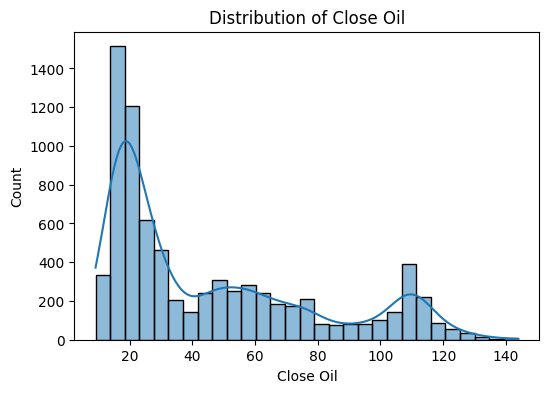

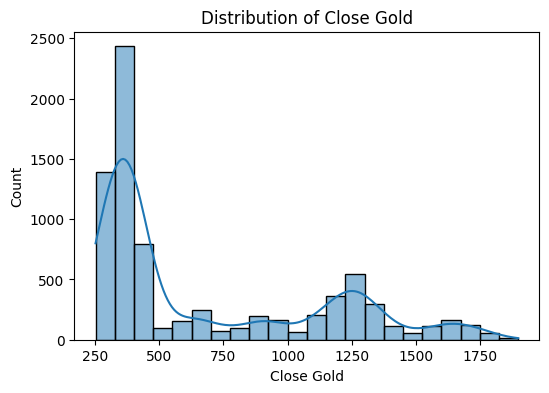

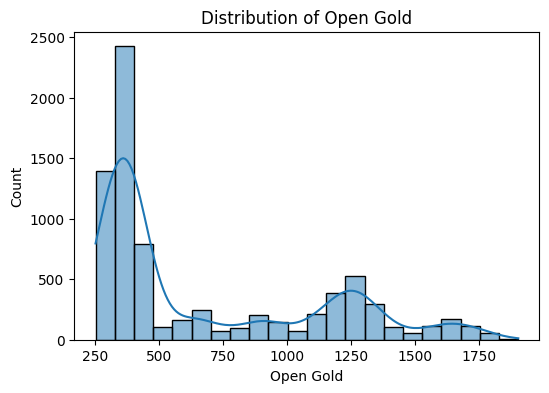

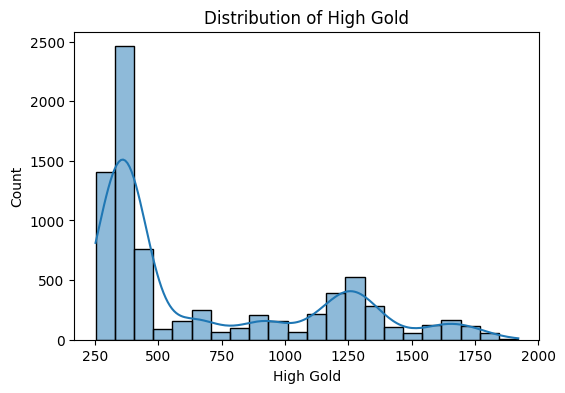

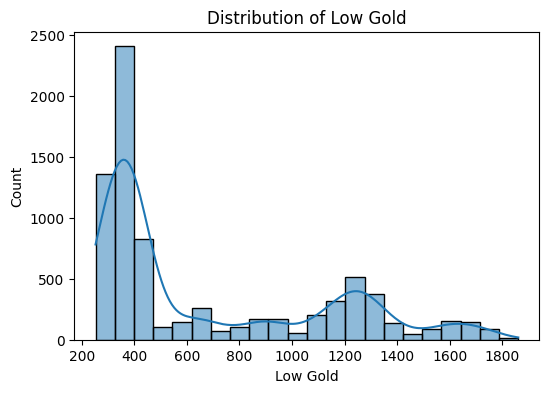

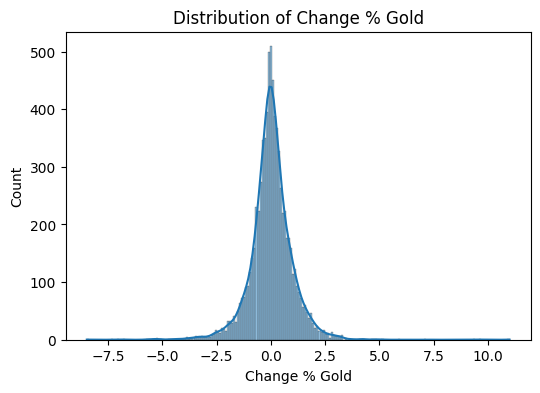

In [36]:
# Columns to check
columns_to_check = df_1987_2018.drop(columns=['Date'])

# Plot histogrammer for hver kolonne
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_1987_2018[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

### Comment
We can see that Volume and Change % Gold are normally distributed. Volume are tilted to the left and Change % Gold has an almost perfect normal distribution. The other values are not normally distributed and it makes sense as we know the price of stock indexes mostly go up over time.

## Outliers
Now let's have a look at outliers in our data.

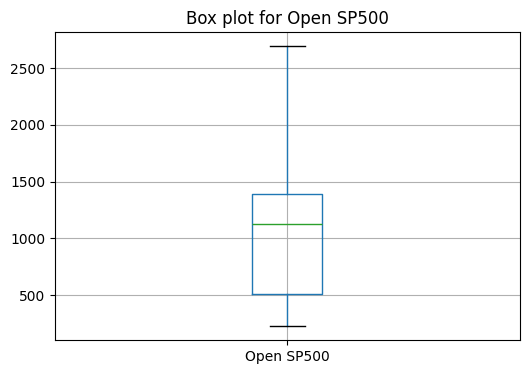

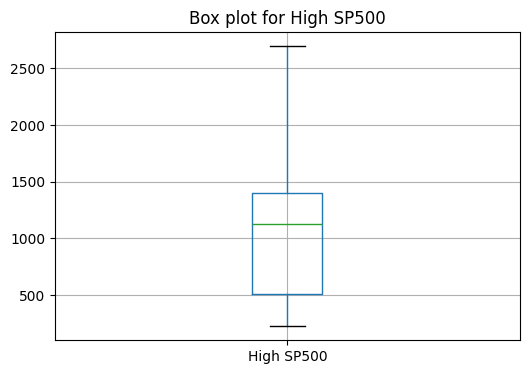

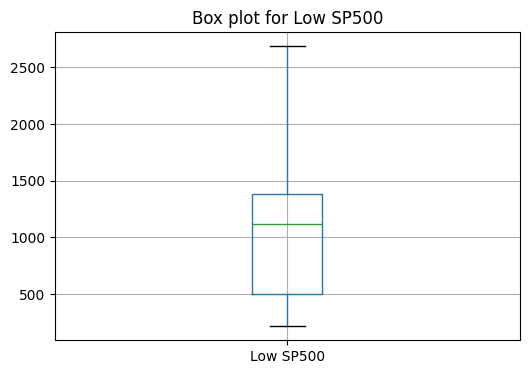

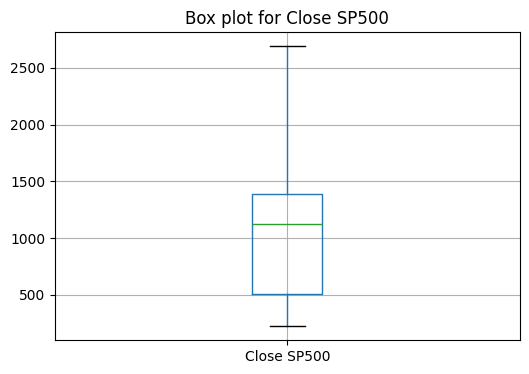

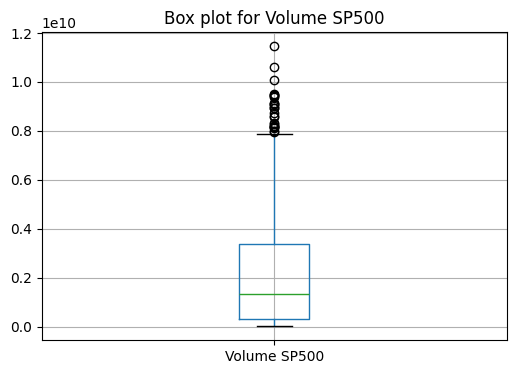

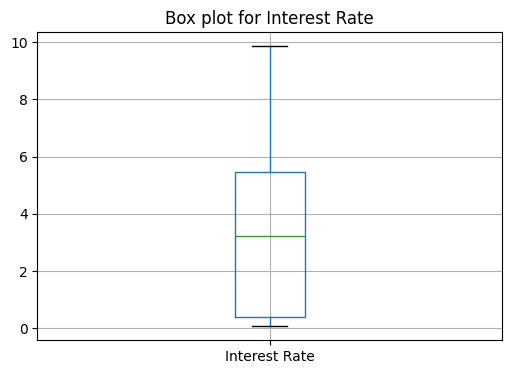

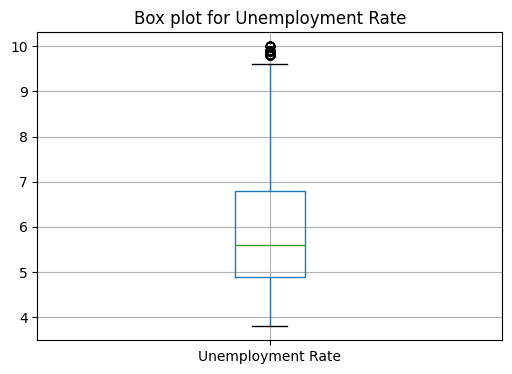

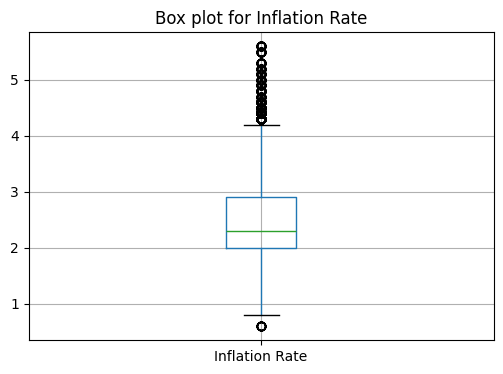

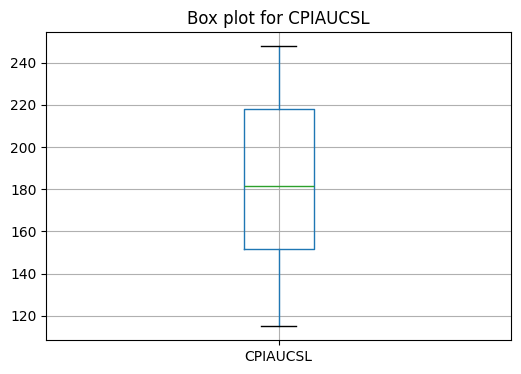

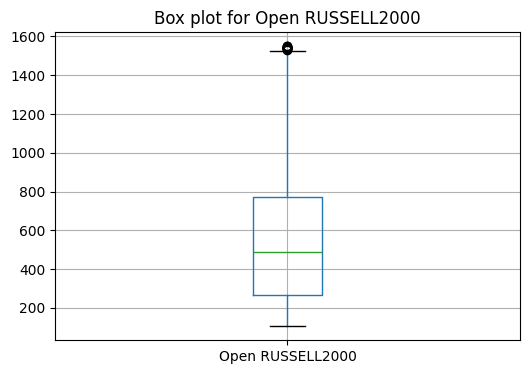

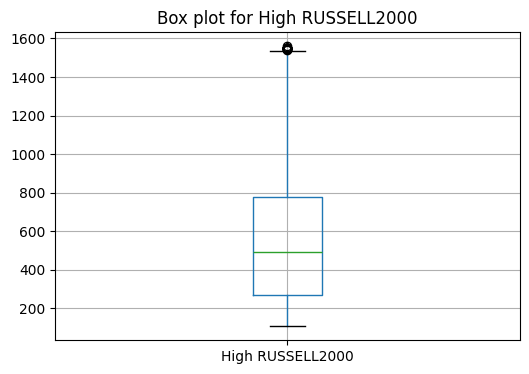

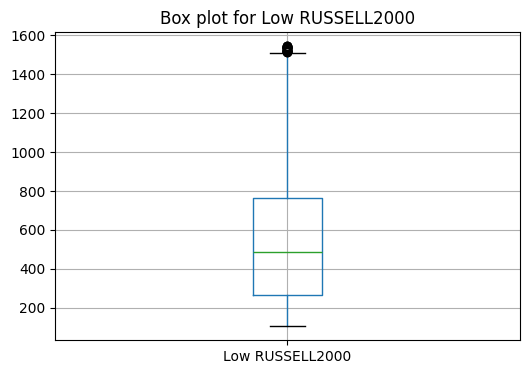

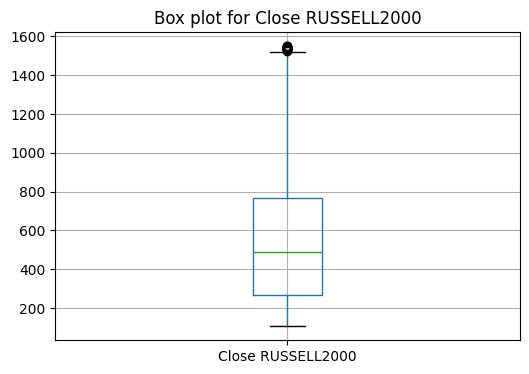

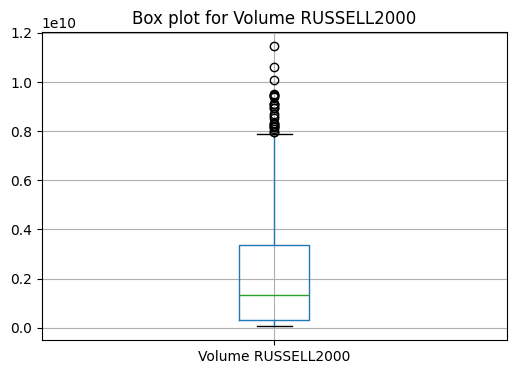

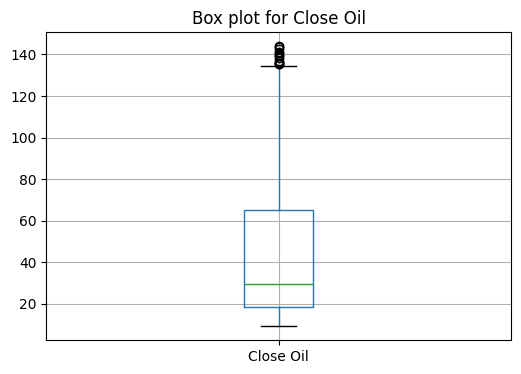

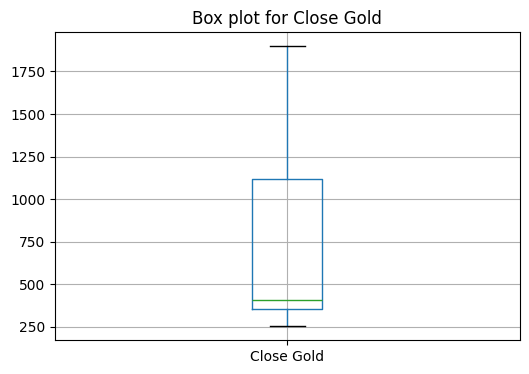

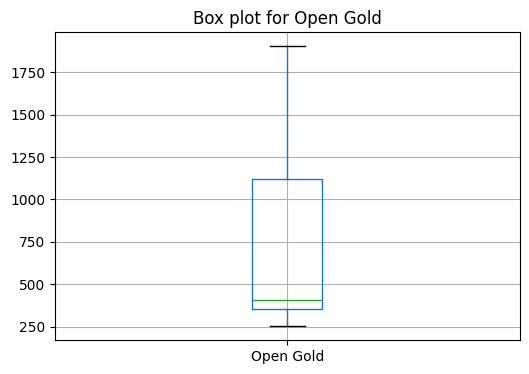

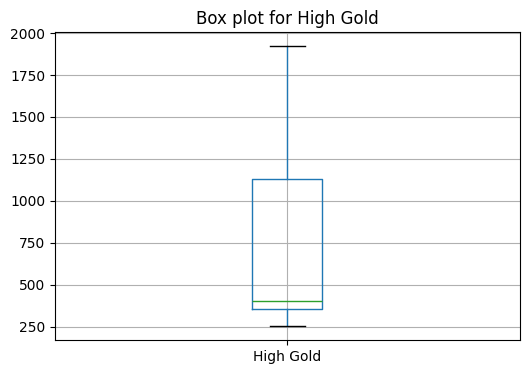

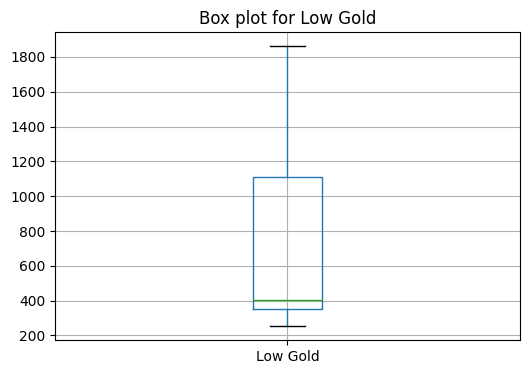

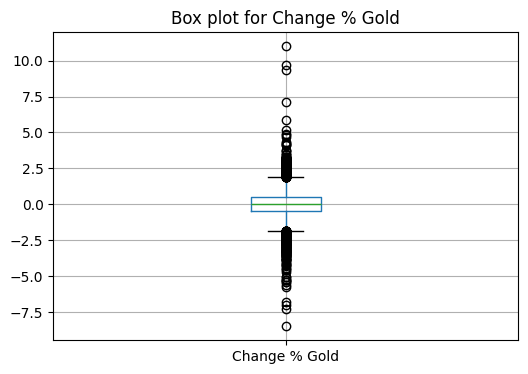

In [37]:
for col in columns_to_check:
    plt.figure(figsize=(6, 4))
    df_1987_2018.boxplot(column=[col])
    plt.title(f'Box plot for {col}')
    plt.show()

### Comment
We obsereve that stock index Volume, Inflation Rate and Change % Gold shows outliers. For now we will not remove or change the outlier values, because we think that outliers are important to be able to predict the stock market.

## Data correlation
Let's take a look of the initial correlation of our data.

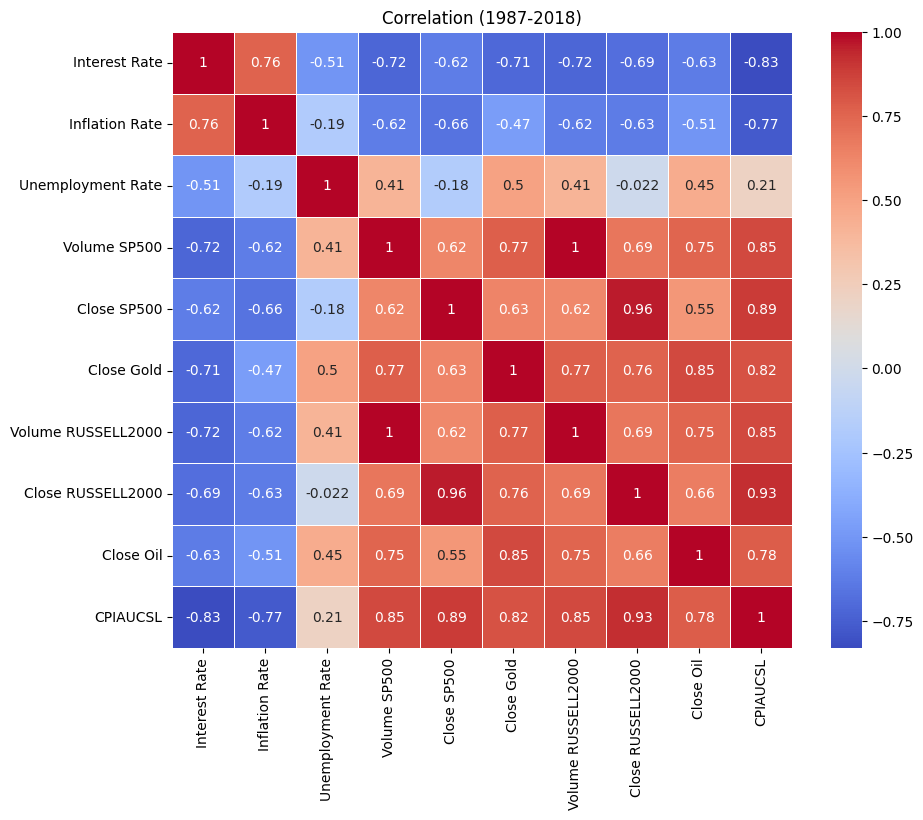

In [38]:
plt.figure(figsize=(10, 8))
corrmatt_1987_2018 = df_1987_2018[['Interest Rate', 'Inflation Rate', 'Unemployment Rate', 'Volume SP500', 'Close SP500', 'Close Gold', 'Volume RUSSELL2000', 'Close RUSSELL2000', 'Close Oil', 'CPIAUCSL']].corr()
sns.heatmap(corrmatt_1987_2018, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987-2018)')
plt.show()

### Comment
We observe a clear positive correlation between all stocks and the CPI. Additionally, there is a distinct negative correlation between the stocks and both interest rates and inflation. These values are important for our upcoming work with machine learning.

## Feature engineering - adding column with change values
For further investigation we will now create new columns that shows the changes from day to day of the close columns. This will tell us of much the stock index goes up or down. This might show som other important correlations.

In [39]:
# Calculate changes between the
#df_1987_2018['Interest_Rate_Change'] = df_1987_2018['Interest Rate'].diff()
#df_1987_2018['Inflation_Rate_Change'] = df_1987_2018['Inflation Rate'].diff()
#df_1987_2018['Unemployment_Rate_Change'] = df_1987_2018['Unemployment Rate'].diff()
#df_1987_2018['CPI_Change'] = df_1987_2018['CPIAUCSL'].diff()

# Calculate the difference between the Open and Close value on the same day
df_1987_2018['OPEN_CLOSE_CHANGE_ABB_SP500'] = (df_1987_2018['Close SP500'] - df_1987_2018['Open SP500'])
df_1987_2018['OPEN_CLOSE_CHANGE_ABB_RUSSELL2000'] = (df_1987_2018['Close RUSSELL2000'] - df_1987_2018['Open RUSSELL2000'])
df_1987_2018['OPEN_CLOSE_CHANGE_ABB_Gold'] = (df_1987_2018['Close Gold'] - df_1987_2018['Open Gold'])

In [40]:
df_1987_2018.columns

Index(['Open SP500', 'High SP500', 'Low SP500', 'Close SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold'],
      dtype='object')

## Now lets see how the new created features are correlated

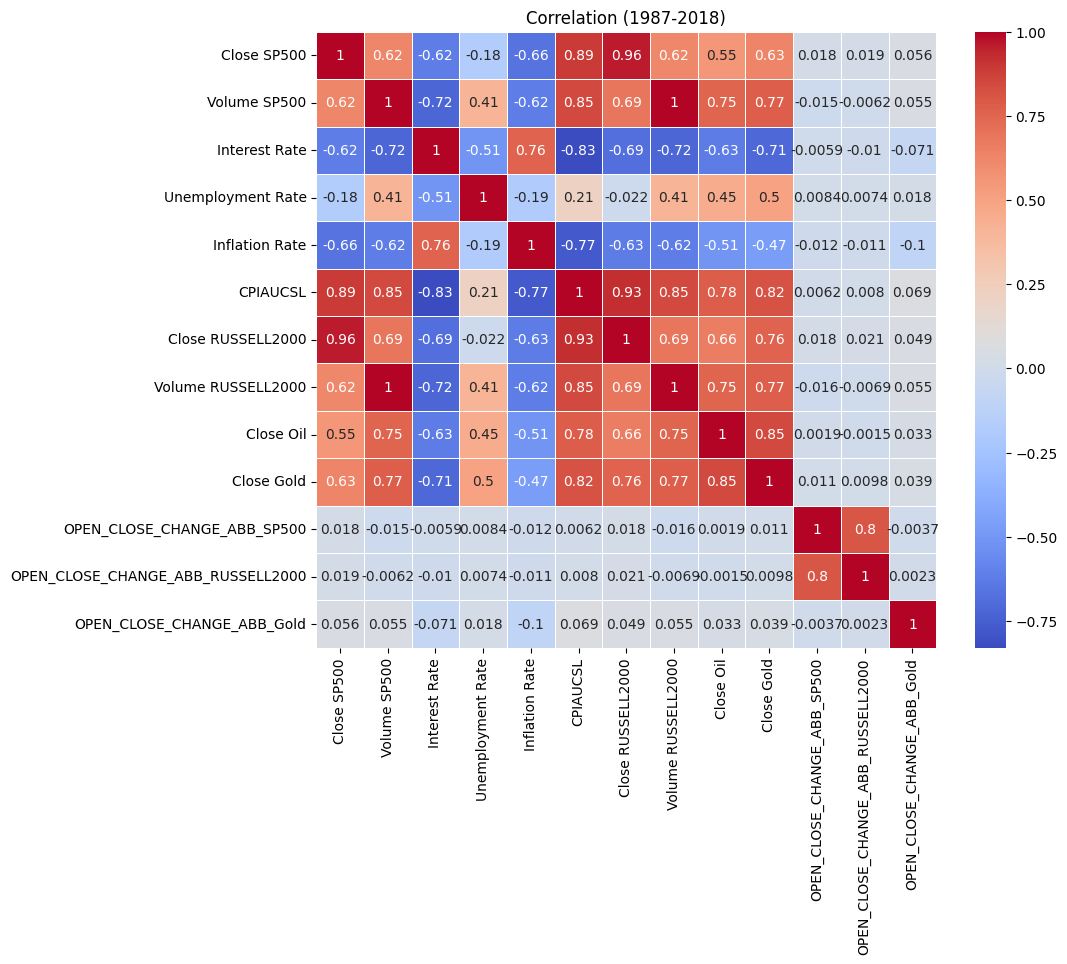

In [41]:
plt.figure(figsize=(10, 8))
corrmatt_1987_2018 = df_1987_2018[[#'Open SP500', 'High SP500', 'Low SP500', 
       'Close SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       #'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       #'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold'
       ]].corr()
sns.heatmap(corrmatt_1987_2018, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987-2018)')
plt.show()

## Comment
The new created features does not show any kind og usefull correlation. Maybe it is because the data we are working with af on daily basis. And because we forward filled the interest and other features. 

Therefore we will now look into monthly data. We will create a new dataset where we group the rows by month and aggregate the values differently based on the data we have.

### Analysing trends
We will now have a look at the trends by grouping every month and aggregate the mean

In [42]:
df_1987_2018.columns

Index(['Open SP500', 'High SP500', 'Low SP500', 'Close SP500', 'Volume SP500',
       'Interest Rate', 'Unemployment Rate', 'Inflation Rate', 'CPIAUCSL',
       'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold', 'Date',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold'],
      dtype='object')

In [43]:
# Set 'Date' as the index, required for resampling
df_1987_2018.set_index('Date', inplace=True)

# Create a new dataset
df_monthly = df_1987_2018.resample('M').agg({
    'Open SP500': 'first',        # Opening price for S&P 500 at the beginning of the month
    'High SP500': 'max',          # Highest price for S&P 500 during the month
    'Low SP500': 'min',           # Lowest price for S&P 500 during the month
    'Close SP500': 'last',        # Closing price for S&P 500 at the end of the month
    'Volume SP500': 'sum',        # Total trading volume for S&P 500 during the month
    'Interest Rate': 'last',      # Last available interest rate during the month
    'Unemployment Rate': 'last',  # Last available unemployment rate during the month
    'Inflation Rate': 'last',     # Last available inflation rate during the month
    'CPIAUCSL': 'last',           # Last available CPI value during the month
    'Open RUSSELL2000': 'first',  # Opening price for Russell 2000 at the beginning of the month
    'High RUSSELL2000': 'max',    # Highest price for Russell 2000 during the month
    'Low RUSSELL2000': 'min',     # Lowest price for Russell 2000 during the month
    'Close RUSSELL2000': 'last',  # Closing price for Russell 2000 at the end of the month
    'Volume RUSSELL2000': 'sum',  # Total trading volume for Russell 2000 during the month
    'Close Oil': 'last',          # Closing price for Oil at the end of the month
    'Close Gold': 'last',         # Closing price for Gold at the end of the month
    'Open Gold': 'first',         # Opening price for Gold at the beginning of the month
    'High Gold': 'max',           # Highest price for Gold during the month
    'Low Gold': 'min',            # Lowest price for Gold during the month
    'Change % Gold': 'last',      # Last available percentage change for Gold during the month
    'OPEN_CLOSE_CHANGE_ABB_SP500': 'sum',  # Total percentage change from open to close for S&P 500 during the month
    'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000': 'sum',  # Total percentage change from open to close for Russell 2000 during the month
    'OPEN_CLOSE_CHANGE_ABB_Gold': 'sum'  # Total percentage change from open to close for Gold during the month
})

# Reset the index to move 'Date' back to a column
df_monthly.reset_index(inplace=True)

For further analysis we will also create columns with the change in macroeconomic data.

In [44]:
# Calculate changes between the
df_monthly['Interest_Rate_Change'] = df_monthly['Interest Rate'].diff()
df_monthly['Inflation_Rate_Change'] = df_monthly['Inflation Rate'].diff()
df_monthly['Unemployment_Rate_Change'] = df_monthly['Unemployment Rate'].diff()
df_monthly['CPI_Change'] = df_monthly['CPIAUCSL'].diff()

In [45]:
df_monthly = df_monthly.dropna()
df_monthly

,Date,Open SP500,High SP500,Low SP500,Close SP500,Volume SP500,Interest Rate,Unemployment Rate,Inflation Rate,CPIAUCSL,...,High Gold,Low Gold,Change % Gold,OPEN_CLOSE_CHANGE_ABB_SP500,OPEN_CLOSE_CHANGE_ABB_RUSSELL2000,OPEN_CLOSE_CHANGE_ABB_Gold,Interest_Rate_Change,Inflation_Rate_Change,Unemployment_Rate_Change,CPI_Change
1,1987-11-30,244.770004,257.209991,225.750000,230.300003,3.892930e+09,6.69,5.8,4.4,115.400,...,490.46,457.14,1.23,-14.419954,0.929994,-51.78,-0.60,0.1,-0.2,0.400
2,1987-12-31,230.320007,253.350006,221.240005,247.080002,3.926750e+09,6.77,5.7,4.2,115.600,...,498.25,479.47,0.70,16.649993,8.750015,-70.46,0.08,-0.2,-0.1,0.200
3,1988-01-31,247.839996,261.779999,240.169998,257.070007,3.664840e+09,6.83,5.7,4.3,116.000,...,487.06,454.01,-2.69,9.150053,5.750007,-72.26,0.06,0.1,0.0,0.400
4,1988-02-29,257.049988,267.820007,247.820007,267.820007,3.693240e+09,6.58,5.7,4.3,116.200,...,454.63,429.45,0.18,11.189988,10.829993,-70.33,-0.25,0.0,0.0,0.200
5,1988-03-31,267.820007,272.640015,256.070007,258.890015,4.052970e+09,6.58,5.7,4.4,116.500,...,456.74,427.66,-0.63,-8.829986,6.000001,-48.16,0.00,0.1,0.0,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,2017-08-31,2477.100098,2490.870117,2417.350098,2471.649902,7.061603e+10,1.07,4.7,2.2,245.183,...,1326.14,1251.41,1.02,-12.118655,-19.870245,44.48,0.00,0.0,0.0,1.020
359,2017-09-30,2474.419922,2519.439941,2446.550049,2519.360107,6.633798e+10,1.06,4.7,2.2,246.435,...,1357.94,1277.64,-0.61,30.170895,83.840209,-43.04,-0.01,0.0,0.0,1.252
360,2017-10-31,2521.199951,2582.979980,2520.399902,2575.260010,7.087157e+10,1.07,4.7,2.2,246.435,...,1306.80,1260.89,-0.37,26.179931,8.090335,-6.61,0.01,0.0,0.0,0.000
361,2017-11-30,2583.209961,2657.739990,2557.449951,2647.580078,7.317326e+10,1.07,4.7,2.2,247.284,...,1299.20,1265.55,-0.69,69.291017,41.080205,4.46,0.00,0.0,0.0,0.849


In [46]:
df_monthly.columns

Index(['Date', 'Open SP500', 'High SP500', 'Low SP500', 'Close SP500',
       'Volume SP500', 'Interest Rate', 'Unemployment Rate', 'Inflation Rate',
       'CPIAUCSL', 'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       'Open Gold', 'High Gold', 'Low Gold', 'Change % Gold',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold', 'Interest_Rate_Change',
       'Inflation_Rate_Change', 'Unemployment_Rate_Change', 'CPI_Change'],
      dtype='object')

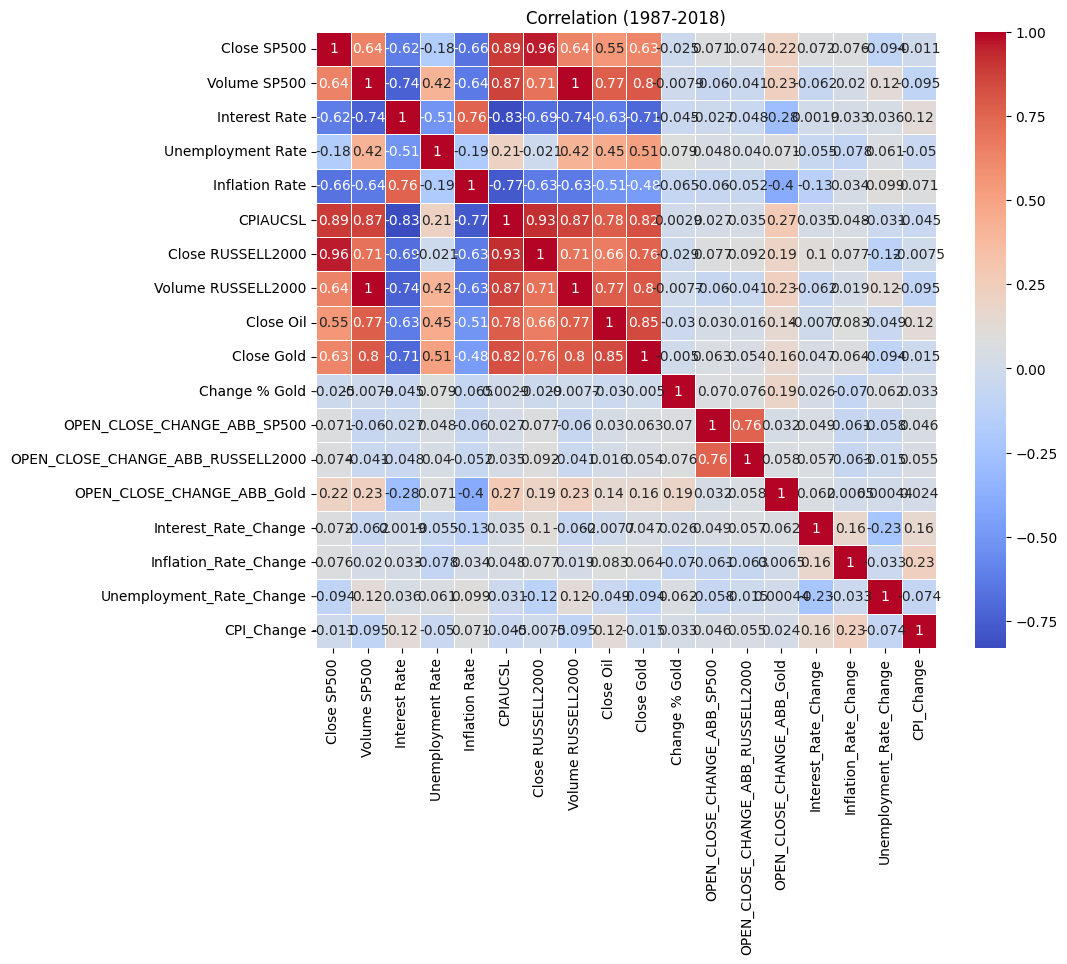

In [47]:
plt.figure(figsize=(10, 8))
corrmatt_monthly = df_monthly[[#'Open SP500', 'High SP500', 'Low SP500', 
                               'Close SP500',
       'Volume SP500', 'Interest Rate', 'Unemployment Rate', 'Inflation Rate',
       'CPIAUCSL', #'Open RUSSELL2000', 'High RUSSELL2000', 'Low RUSSELL2000',
       'Close RUSSELL2000', 'Volume RUSSELL2000', 'Close Oil', 'Close Gold',
       #'Open Gold', 'High Gold', 'Low Gold',
       'Change % Gold',
       'OPEN_CLOSE_CHANGE_ABB_SP500', 'OPEN_CLOSE_CHANGE_ABB_RUSSELL2000',
       'OPEN_CLOSE_CHANGE_ABB_Gold', 'Interest_Rate_Change',
       'Inflation_Rate_Change', 'Unemployment_Rate_Change', 'CPI_Change'
       ]].corr()
sns.heatmap(corrmatt_monthly, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation (1987-2018)')
plt.show()

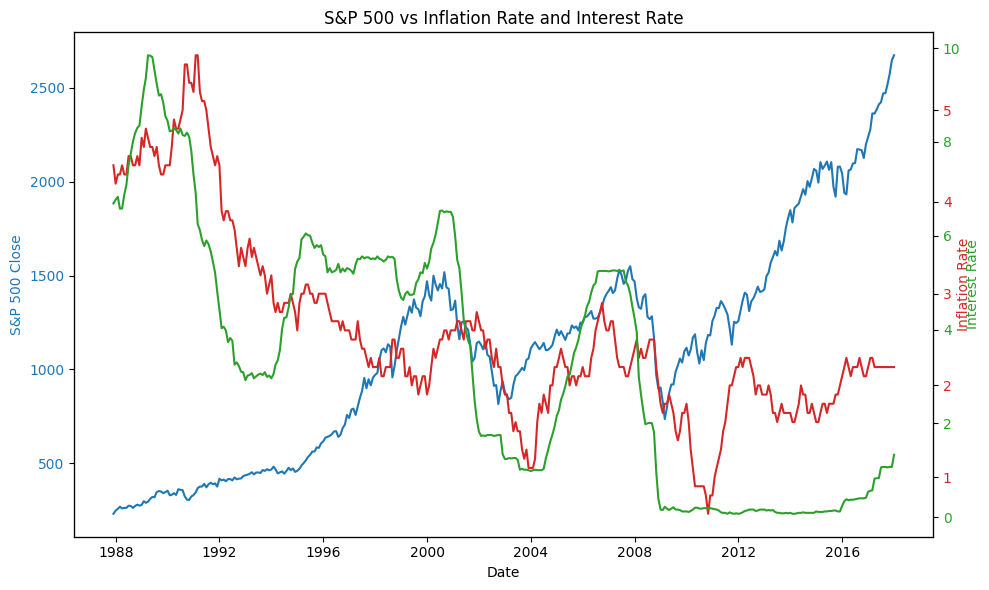

In [48]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Close', color='tab:blue')
ax1.plot(df_monthly['Date'], df_monthly['Close SP500'], color='tab:blue', label='S&P 500 Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate', color='tab:red')
ax2.plot(df_monthly['Date'], df_monthly['Inflation Rate'], color='tab:red', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

ax3 = ax1.twinx()
ax3.set_ylabel('Interest Rate', color='tab:green')
ax3.plot(df_monthly['Date'], df_monthly['Interest Rate'], color='tab:green', label='Interest Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.title('S&P 500 vs Inflation Rate and Interest Rate')
fig.tight_layout()
plt.show()

### Comment
We have explored a correlation matrix with various features to assess the potential for using linear regression to predict the market. From our analysis, we can conclude that there is an overall inverse correlation between index prices and macroeconomic factors. This negative correlation likely stems from the fact that, in the first half of our data, macroeconomic indicators are high while stock index prices are relatively low, whereas the opposite is true in the latter half of the dataset, as shown above.

In [49]:
# Saving to CSV
# df_monthly.to_csv('../datasets/monthly_combined_data.csv', index=False)